# Video Game Sales Data Analysis and Visualisation

### Abstract

For video game retailers, it is necessary to analyze the market, identify patterns that determine the success of games. Understanding sales trends by platform and genre, and user profiles based on region will allow retailers to place a bet on a potentially popular product and plan advertising campaigns that will help to boost the store's business.

In this project, we will be cleaning and wrangling a dataset of over 16000 records of video game sales data in python pandas, preparing it for exploratory analysis. Thereafter, we will utilise the seaborn and matplotlib libraries to visualise aspects of this dataset, such as the sales by platform, genre and publisher. We will also observe the breakdown of these categories by region.

### About the Dataset

The data is taken from the Video Game Sales dataset on [Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) vgsales.csv file generated by a scrape of [vgchartz.com](vgchartz.com). It contains a list of video games with physical sales from 1980 to 2016.

Data Dictionary:

|Variable|Description|
|-----|-----|
|Rank | Ranking of overall sales|
|Name | The games name|
|Platform | Platform of the games release (i.e. PC,PS4, etc.)|
|Year | Year of release|
|Genre | Genre of the game|
|Publisher | Publisher of the game|
|NA_Sales | Sales in North America (in millions)|
|EU_Sales | Sales in Europe (in millions)|
|JP_Sales | Sales in Japan (in millions)|
|Other_Sales | Sales in the rest of the world (in millions)|
|Global_Sales | Total worldwide sales (in millions)|
|Critic_score | Aggregate score compiled by Metacritic staff|
|Critic_count | The number of critics used in coming up with the Critic_score|
|User_score | Score by Metacritic's subscribers|
|User_count | Number of users who gave the user_score|
|Developer | Party responsible for creating the game|
|Rating | The ESRB ratings|

### Table of Contents:
1. Data Acquisition
2. Data Preprocessing
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Conclusions

***

## 1. Data Acquisition

### 1.1 Importing the Data

First, let's examine the dataset that will be used in this project.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

### 1.2 Read Data

Using the pandas library, we will read the vgsales.csv file and store it in the games_df variable.

In [2]:
# read in data
games_df = pd.read_csv('data/vgsales.csv')

In [3]:
# preview data
games_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Unnamed: 16
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,NaN
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,NaN
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# get information on the dataset
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  object 
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  object 
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8159 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
 16  Unnamed: 16      4 non-null      object 
dtypes: float64(7

In [5]:
# get statistical description of dataset
games_df.describe()

,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,8159.000000,8137.000000,7590.000000
mean,0.145024,0.077549,0.047388,0.533470,68.741058,26.395846,162.209947
std,0.503283,0.308824,0.186708,1.547958,14.447600,19.019442,561.286794
min,0.000000,0.000000,0.000000,0.000000,0.010000,3.000000,4.000000
25%,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Let's consider this information in more detail.

We see that there are 16 columns in the table consisting of three data types.

The number of values in each columns varies. This indicates that there are missing values in some columns. 

Here, we come across something that is unexpected. According to data dictionary, the data should have 16 columns. However, we can see here that our dataset has an additional 17th column labeled Unnamed:16 with only 4 values.

Taking a closer look, we also notice that the `Year_of_Release`, `NA_Sales` and `User_Score` have a type of `non-null object`. This is suspicious, because the data types of all other sales columns are `non-null float64`. This has also resulted in our `.describe()` table missing statistics on `NA_Sales` and `User_Score`.

***

## 2. Data Cleaning and Pre-processing

In this section, we will be replacing column names, investigating the unnamed column, converting the data to the appropriate types, checking the data for null values or duplicates, and filling in (or deleting) the missing values where possible.

### 2.1 Rename Columns

Let's start by getting a list of column names.

In [6]:
# get column names
games_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Unnamed: 16'],
      dtype='object')

The column names are capitalized. For convenience's sake, let's rename the columns. Then, check the results.

In [7]:
# update column names
games_df = games_df.rename(columns=lambda x: x.lower())

# get column names
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating',
       'unnamed: 16'],
      dtype='object')

### 2.2 Investigate the unnamed column

Let's take a closer look at the data in `unnamed: 16`.

In [8]:
# get rows with values in the `unnamed: 16` column
games_df[~games_df['unnamed: 16'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,unnamed: 16
10708,Steins,Gate,PSV,2013,Adventure,PQube,0.04,0.04,0.00,0.02,0.10,83.0,16,9.2,87,5pb,M
10960,Steins,Gate,PSV,2015,Adventure,PQube,0.00,0.03,0.05,0.01,0.09,86.0,7,9.3,20,5pb,M
12430,Steins,Gate,PS3,2012,Adventure,PQube,0.01,0.02,0.02,0.01,0.06,83.0,8,8.7,51,Nitro+,M
13144,Steins,Gate 0,PS4,2015,Adventure,PQube,0.00,0.00,0.05,0.00,0.05,81.0,17,8.3,29,5pb,M


With just 4 rows of the affected data, we can see that there is already a noticeable pattern: The game titles that would normally take up one column under `name` has been split into two columns. This has caused all subsequent values to be shifted to the right by one column. 

This is likely an issue caused by the game name using a semicolon `;` as a seperator. We will shift these values back to their appropriate columns.

We can see the data from `platform` onwards has shifted to the right. This shift is also likely the cause of the data in `year_of_release`, `na_sales` and `user_score` being `non-null object` type and not `non-null float64` type.

Check the scope of this error by selecting all non-numerical values in `year_of_release`.

In [9]:
# create a new dataframe to work on

# replace null values in `year_of_release` with 0 
shifted = games_df.fillna('0')
shifted = shifted[shifted['year_of_release'].str.isnumeric()==False]

In [10]:
# check data shape
shifted.shape

(26, 17)

In [11]:
# check data
shifted.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,unnamed: 16
7740,Steins,Gate,PSP,2011,Adventure,Kadokawa Shoten,0.00,0.00,0.19,0.00,0.19,0,0,0,0,0,0
10377,Robotics,Notes,PS3,2012,Adventure,5pb,0.00,0.00,0.11,0.00,0.11,0,0,0,0,0,0
10708,Steins,Gate,PSV,2013,Adventure,PQube,0.04,0.04,0.00,0.02,0.1,83.0,16,9.2,87,5pb,M
10960,Steins,Gate,PSV,2015,Adventure,PQube,0.00,0.03,0.05,0.01,0.09,86.0,7,9.3,20,5pb,M
11462,Steins,Gate: Hiyoku Renri no Darling,X360,2011,Adventure,5pb,0.00,0.00,0.08,0.00,0.08,0,0,0,0,0,0


We first combine the titles in the `name` and `platform` columns into 1 column.

In [12]:
# combine names using ; as a seperator
shifted['name'] = shifted['name'] + ';' + shifted['platform']

# check update
shifted.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,unnamed: 16
7740,Steins;Gate,Gate,PSP,2011,Adventure,Kadokawa Shoten,0.00,0.00,0.19,0.00,0.19,0,0,0,0,0,0
10377,Robotics;Notes,Notes,PS3,2012,Adventure,5pb,0.00,0.00,0.11,0.00,0.11,0,0,0,0,0,0
10708,Steins;Gate,Gate,PSV,2013,Adventure,PQube,0.04,0.04,0.00,0.02,0.1,83.0,16,9.2,87,5pb,M
10960,Steins;Gate,Gate,PSV,2015,Adventure,PQube,0.00,0.03,0.05,0.01,0.09,86.0,7,9.3,20,5pb,M
11462,Steins;Gate: Hiyoku Renri no Darling,Gate: Hiyoku Renri no Darling,X360,2011,Adventure,5pb,0.00,0.00,0.08,0.00,0.08,0,0,0,0,0,0


`name` has been updated successfully. We can work on moving the remaining values back to the proper columns. We will use the `df.shift()` function to move our selected columns 1 position to the left. Then, check for non-numeric values in the `year_of_release` column.

In [13]:
# shift columns 3-17 to the left by 1
shifted.iloc[:, 1:] = shifted.iloc[:, 1:].shift(-1, axis=1)

# check update
shifted.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,unnamed: 16
7740,Steins;Gate,PSP,2011,Adventure,Kadokawa Shoten,0.00,0.00,0.19,0.00,0.19,0,0,0,0,0,0,NaN
10377,Robotics;Notes,PS3,2012,Adventure,5pb,0.00,0.00,0.11,0.00,0.11,0,0,0,0,0,0,NaN
10708,Steins;Gate,PSV,2013,Adventure,PQube,0.04,0.04,0.00,0.02,0.1,83.0,16,9.2,87,5pb,M,NaN
10960,Steins;Gate,PSV,2015,Adventure,PQube,0.00,0.03,0.05,0.01,0.09,86.0,7,9.3,20,5pb,M,NaN
11462,Steins;Gate: Hiyoku Renri no Darling,X360,2011,Adventure,5pb,0.00,0.00,0.08,0.00,0.08,0,0,0,0,0,0,NaN


In [14]:
# check for non-numeric values 
shifted[shifted['year_of_release'].str.isnumeric()==False]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,unnamed: 16


There are no more non-numeric values in `year_of_release`. This tells us that all the values were succesfully corrected. Now,  we can proceed to update the affected section of the main data.

In [15]:
# convert our dummy 0s back to null before updating
shifted = shifted.replace('0', np.nan)

In [16]:
# update main data
games_df.update(shifted)
games_df.loc[shifted.index] = shifted

# check a section of the replaced data
games_df.loc[shifted.index].head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,unnamed: 16
7740,Steins;Gate,PSP,2011,Adventure,Kadokawa Shoten,0.0,0.00,0.19,0.00,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10377,Robotics;Notes,PS3,2012,Adventure,5pb,0.0,0.00,0.11,0.00,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10708,Steins;Gate,PSV,2013,Adventure,PQube,0.04,0.04,0.00,0.02,0.10,83.0,16,9.2,87,5pb,M,NaN
10960,Steins;Gate,PSV,2015,Adventure,PQube,0.0,0.03,0.05,0.01,0.09,86.0,7,9.3,20,5pb,M,NaN
11462,Steins;Gate: Hiyoku Renri no Darling,X360,2011,Adventure,5pb,0.0,0.00,0.08,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we can drop the unnamed column from the main dataframe.

In [17]:
# drop unnamed column
games_df = games_df.drop('unnamed: 16', axis=1)

### 2.3 Convert datatypes
Now that we have fixed some of our data, let's also tackle the datatypes of each column. There are still many columns here that we would expect to be numeric that are not. For example `critic_count` and `user_score`.

In [18]:
# check dtypes
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  object 
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  object 
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   object 
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   object 
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(5), object(11)
memory usage: 2.0+ MB


In [19]:
# convert to numeric
c_list = ['year_of_release', 'na_sales', 'critic_count', 'user_score', 'user_count']

for c in c_list:
    games_df[c] = pd.to_numeric(games_df[c], errors='coerce')

In [20]:
# check update
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       7590 non-null   float64
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


### 2.4 Check for Duplicate Records and Missing Data

Let's check for duplicate records. If there are any, we will delete them.

In [21]:
# get number of duplicates
games_df.duplicated().sum()

0

In [22]:
# drop duplicates
games_df = games_df.drop_duplicates()

# check update
games_df.duplicated().sum()

0

Let's move on to checking for missing values.

In [23]:
# get number of missing values
games_df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         9129
user_count         9129
developer          6623
rating             6769
dtype: int64

Drop missing values in `name`. The number of missing values is small and it will be difficult to find the name given the other information that we have; it is easier to drop these missing values.

In [24]:
# drop missing values in `name`
games_df = games_df.dropna(subset=['name'])

# check update
games_df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8580
critic_count       8580
user_score         9127
user_count         9127
developer          6621
rating             6767
dtype: int64

### 2.5 Missing Values In `year`

Let's look at the missing values in the ['year'] column.

In [25]:
# get rows with missing values in ['year'] column
games_df[games_df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN


We are missing the year of release data for 269 games. Note that some video game titles contain the year of release of the game. For example, FIFA Soccer 2004 was released in 2004. Following this logic, we can find replacements for some missing data in the ['year'] column.

Let's search for such strings and create a dictionary, where the key will be the index of game titles that contain their release year, and the release year itself will be the value.

In [26]:
idx_year = {} 

# iterate over rows with missing year information
for row in games_df[games_df['year_of_release'].isna()].itertuples():
    for item in row.name.split(' '):  # split game title into separate words
        if item == row.name.split(' ')[-1]:  # take the last word in the list
            try:  
               
                # if the last word is a number then
                if len(item) == 2 or len(item) == 4: # check length of last word
                    item = int(item)  # convert to integer type
                    
                    # if last number is 2 digits, make a full year by adding the century
                    if item < 21: item += 2000
                    elif item > 80 and item < 100: item += 1900
                    
                    # if last number is 4 digits, check that it is more than 1980 
                    if item >= 1980: idx_year[row.Index] = item
           
            except:  
                #if the last word is not a number then
                continue
            
            
# check output of the resulting dictionary
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 183   | year: 2004
index: 377   | year: 2004
index: 475   | year: 2006
index: 1301  | year: 1999
index: 1650  | year: 2003
index: 2479  | year: 2007
index: 2849  | year: 2011
index: 3413  | year: 2006
index: 3486  | year: 2002
index: 4205  | year: 2007
index: 4775  | year: 2003
index: 5156  | year: 2003
index: 5655  | year: 2005
index: 5889  | year: 2003
index: 8919  | year: 2005
index: 13196 | year: 2011
index: 13930 | year: 2006
index: 15955 | year: 2008
index: 16081 | year: 2007
index: 16376 | year: 2008


Now that we have obtained release years from the game titles, let's replace the missing release years for these games.

In [27]:
# iterate over the dictionary and replace the missing values
for key, value in idx_year.items():
    games_df.loc[key, 'year_of_release'] = value

We then check the number of rows in the ['year'] column that still contain missing values.

In [28]:
# get number of rows with missing values
len(games_df[games_df['year_of_release'].isna()])

249

Now we are missing the year of release data for 249 games. This is less than after the previous check, which means the replacements were completed successfully. It's possible to find the year of release for the remaining 249 games by searching the Internet, but 249 rows is only about 1.5% of the total amount of data, which shouldn't significantly affect the results of the study. Hence it's acceptable to simply remove these records and continue working with the existing dataset. If at some point we realize that we don't have enough data for analysis, we can then return to the issue of searching the Internet to find the missing information.

In [29]:
# delete rows with missing data  in ['year'] and reset indexes
games_df = games_df.dropna(subset=['year_of_release']).reset_index(drop=True)

# check update
games_df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher            34
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8470
critic_count       8470
user_score         8992
user_count         8992
developer          6546
rating             6685
dtype: int64

### 2.6 Missing Values in `publisher`

Let's look at the missing values in the ['publisher'] column.

In [30]:
# get rows with missing values for ['publisher']
games_df[games_df['publisher'].isna()].head(10)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
474,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,NaN,1.57,1.02,0.0,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1291,Triple Play 99,PS,1999.0,Sports,NaN,0.81,0.55,0.0,0.10,1.46,NaN,NaN,NaN,NaN,NaN,NaN
1653,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2189,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN
3113,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3124,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3712,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.0,0.01,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4455,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.0,0.01,0.43,NaN,NaN,NaN,NaN,NaN,NaN
4562,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.0,0.01,0.42,NaN,NaN,NaN,NaN,NaN,NaN
5564,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0.0,0.01,0.32,NaN,NaN,NaN,NaN,NaN,NaN


A large portion of the missing data are Game Boy Advance Videos. The vgchartz [database](https://www.vgchartz.com/games/games.php?name=Video&keyword=&console=GBA&region=All&developer=&publisher=&goty_year=&genre=Misc&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=50&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&showvgchartzscore=1&shownasales=0&showdeveloper=0&showcriticscore=0&showcriticscore=1&showpalsales=0&showreleasedate=0&showreleasedate=1&showuserscore=0&showuserscore=1&showjapansales=0&showlastupdate=0&showlastupdate=1&showothersales=0&showshipped=0&showshipped=1) in 2023 lists the publisher of GBA Videos as Majesco, excepting Pokemon GBA Videos published by Nintendo. Thus, we will go ahead and update the publisher for these GBA Videos to Majesco then check the updated dataframe.

In [31]:
# update missing publishers of GBA Videos to Majesco
games_df.loc[games_df['publisher'].isna() & 
             games_df['name'].str.contains('|'.join(["Game Boy Advance Video", "Gameboy Advance Video"])), 
            'publisher'] = 'Majesco'

# check update
len(games_df[games_df['publisher'].isna()])

12

Now we are missing the publisher data for 12 games.

Like the missing data in ['year'], it's possible to find the data via Internet search, but 16 rows is an even smaller fraction of the current data. Hence we will also remove these records with missing values and move on.

In [32]:
# delete rows with missing data in ['publisher'] and reset indexes
games_df = games_df.dropna(subset=['publisher']).reset_index(drop=True)

# check the number of missing values in the dataset
games_df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8459
critic_count       8459
user_score         8982
user_count         8982
developer          6537
rating             6675
dtype: int64

### 2.7 Missing values in `critic_score`

In [33]:
# select rows with missing data in the critic_score column
games_df[games_df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN


We don't have a critic score for 8437 games, which is about 50% of our data.

Let's try to find a correlation in the available data between critics' ratings and the data that we have:

- `year_of_release`
- `na_sales`
- `eu_sales`
- `jp_sales`
- `other_sales`
- `global_sales`

in the hopes that we might be able to interpolate some critic scores from the available data.

In [34]:
# get correlations
c_list = ['year_of_release','na_sales','eu_sales','jp_sales','other_sales','global_sales']

for c in c_list:
    print(f"critic_score against {c}: {games_df['critic_score'].corr(games_df[c])}")

critic_score against year_of_release: 0.010535507652385076
critic_score against na_sales: 0.24079214288671635
critic_score against eu_sales: 0.22133573327597977
critic_score against jp_sales: 0.1531756929118075
critic_score against other_sales: 0.19888923523739516
critic_score against global_sales: 0.24579350638815745


In all the cases considered, there is only a very weak or weak correlation between `critic_score` and the considered columns.

Therefore, interpolating from critics' ratings to fill gaps in data does not seem appropriate.

### 2.8 Handling missing data in `user_score`

Just like critic_score, let's find the correlation coefficient between `user_score` and `year_of_release`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales` and `global_sales`.

In [35]:
# get correlations
c_list = ['year_of_release','na_sales','eu_sales','jp_sales','other_sales','global_sales']

for c in c_list:
    print(f"user_score against {c}: {games_df['user_score'].corr(games_df[c])}")

user_score against year_of_release: -0.26812496970604666
user_score against na_sales: 0.08562228313217021
user_score against eu_sales: 0.05522371422904805
user_score against jp_sales: 0.12615660395054284
user_score against other_sales: 0.056924598487447235
user_score against global_sales: 0.08786837347817159


None of the correlations look very strong here either. Now let's try `user_score` against `critic_score`.

In [36]:
# get correlation
games_df['critic_score'].corr(games_df['user_score'])

0.5789669461871743

The correlation coefficient is average but stronger than what we had.

Let's look at the distributions of user ratings and critic ratings.

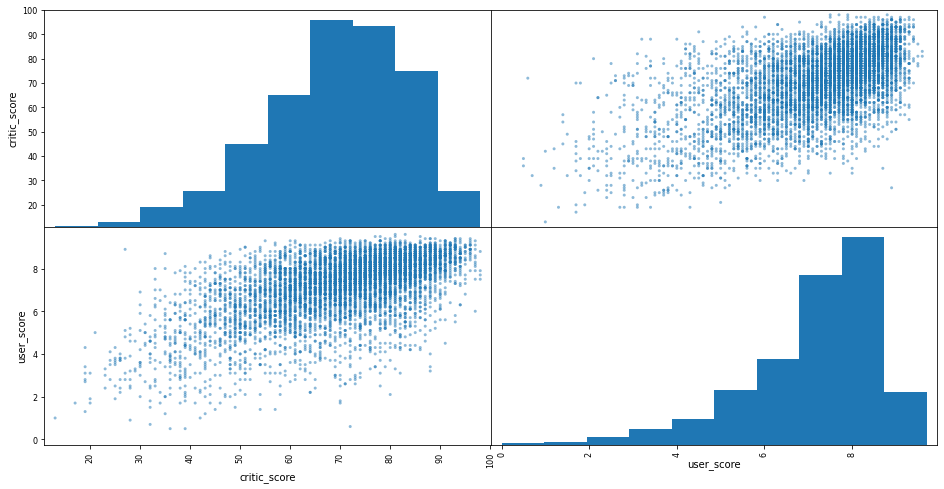

In [37]:
pd.plotting.scatter_matrix(games_df[['critic_score', 'user_score']], figsize=(16,8));

The distributions are close to normal. The correlation is moderate.

In all the cases considered, there was only a very weak or simply weak correlation between columns we considered and `user_score`. An average correlation was obtained between `user_score` and `critic_score`:

We did not obtain high or very high correlation for any of the studied characteristics. Therefore, averaging user ratings on one of these criteria to fill gaps does not seem appropriate.

### 2.9 Handling missing data in `developer` and `rating`

Since `developer` and `rating` are categorical variables, it makes most sense to replace missing values with a string. We will replace missing values with 'Unknown'.

In [38]:
# replace missing values with 'Unknown'
games_df['developer'] = games_df['developer'].fillna('Unknown')
games_df['rating'] = games_df['rating'].fillna('Unknown')

#check update
games_df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8459
critic_count       8459
user_score         8982
user_count         8982
developer             0
rating                0
dtype: int64

After processing, missing values still remain in `critic_score`, `user_score`, `critic_count`, `user_count` columns. We do not have enough data to restore these gaps. We also see that gaps in columns often occur together, i.e. no data for the same games. This is most likely due to the fact that this data was simply not loaded into the table.

Further, the number of missing values are significant compared to the amount of data present in the dataset, making up about 50% of the records. Removing such a large amount of data will distort the results of the study. Therefore we will leave the missing data be, as it is better to work with less, but good quality, data.

***

## 3. Data Exploration and Visualization

In [39]:
games_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
count,16456.000000,16456.000000,16456.000000,16456.000000,16456.000000,16456.000000,7997.000000,7997.000000,7474.000000,7474.000000
mean,2006.486145,0.264352,0.146004,0.078438,0.047662,0.536710,69.006502,26.429286,7.127549,162.778967
std,5.875270,0.818699,0.506843,0.310993,0.188045,1.558682,13.920663,19.000445,1.498620,563.470780
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In this section, we will consider the distribution of games by year of release and global sales by year, genre, platform and publisher. Then we will dive deeper into the breakdown of such sales by region in order to gain a better understanding of user profiles based on region.

### 3.1 Distribution of Games Released per Year

Let's see how many games were released over the years. We do this by grouping up the data by year, then counting the number of games per year.

In [57]:
# convert `year` to int type
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

# drop data after 2016
games_df = games_df[games_df['year_of_release']<=2016]

In [58]:
# number of released games grouped by release year
games_per_year = games_df.groupby('year_of_release', as_index=False).name \
                         .count() \
                         .rename(columns={'name': 'num_of_games'}) \
                         .sort_values('year_of_release', ascending=True)

Now let's build a bar chart of the distribution of the number of games released by year.

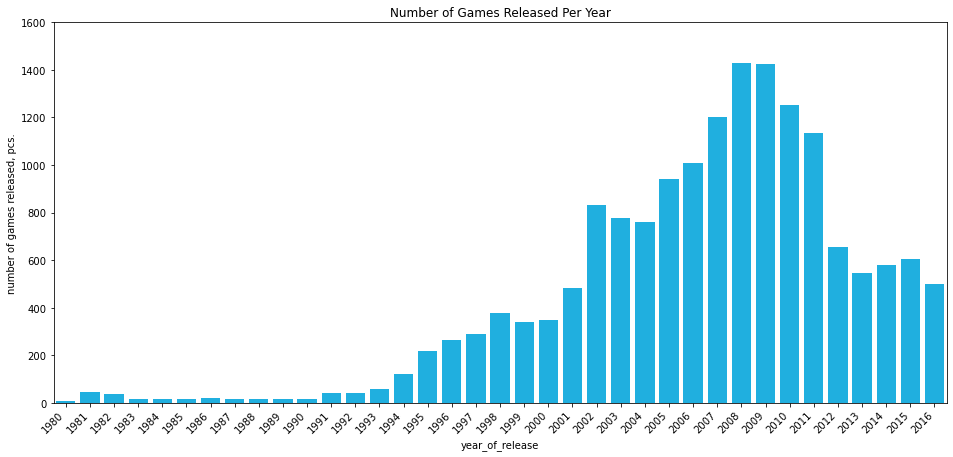

In [59]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=games_per_year['year_of_release'],
                 y=games_per_year['num_of_games'],
                 orient='v',
                 color='deepskyblue');

# set axis labels and title
plt.ylabel('number of games released, pcs.')
plt.xticks(rotation=45, ha='right')
ax.set_ylim(0,1600)
plt.title('Number of Games Released Per Year');

This graph shows that the bulk of games were released in the first decade of the 21st century, with a peak in 2008-2009. After 2011, the number of games released decreased significantly. When we consider that the sales data tracks physical sales releases, we can deduce this decline is most likely due to the increasing in popularity of digital releases for video games over time.

### 3.2 Trend of Game Sales per Year
Let's look at the distribution of total sales.

In [43]:
# number of sales grouped by release year
sales_per_year = games_df.groupby('year_of_release', as_index=False) \
                         .agg({'global_sales': 'sum'}) \
                         .sort_values('year_of_release', ascending=True)

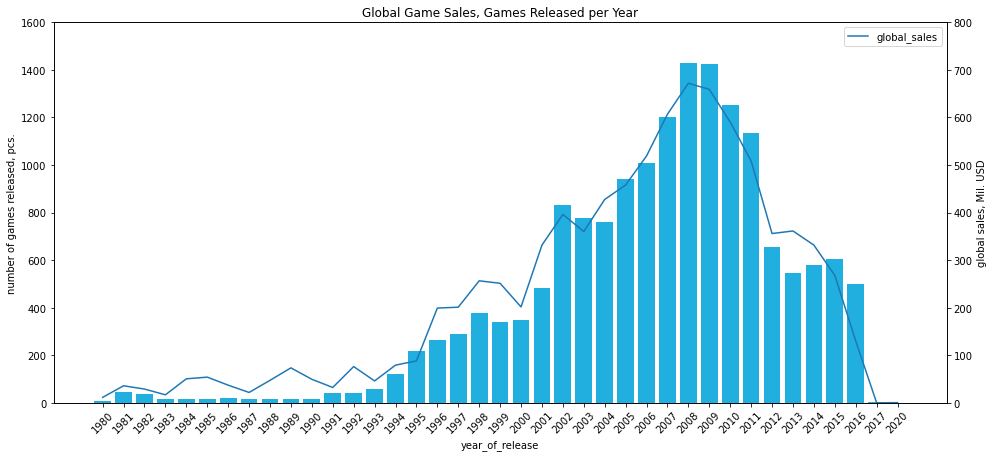

In [44]:
# plot size
fig, ax1 = plt.subplots(figsize=(16, 7))

# plot bar, line charts
ax1 = sns.barplot(x='year_of_release', y='num_of_games', data = games_per_year, color='deepskyblue')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=ax1.get_xticks(), y='global_sales', sort=False, data = sales_per_year, ax=ax2)

# set axis labels and title
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)
ax1.set_title('Global Game Sales, Games Released per Year');
ax1.set_ylabel('number of games released, pcs.')
ax2.set_ylabel('global sales, Mil. USD')
ax1.set_ylim(0,1600)
ax2.set_ylim(0,800)

plt.legend(['global_sales'])
plt.show()

In general, the trend of global sales closely follows the trend of the release of new games, with values increasing in the early 2000s, when the computer games industry was beginning to grow, reaching a peak in 2008-2009 and experiencing a sharp decline shortly after.

Let's consider a breakdown of sales by region now.

In [45]:
# regional sales grouped by platform
plf_sales_region = games_df[['year_of_release', 'global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']] \
                       .groupby('year_of_release', as_index=False) \
                       .agg({'global_sales':'sum','na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum'}) \
                       .melt(id_vars=['year_of_release']) \
                       .sort_values('value', ascending=False)

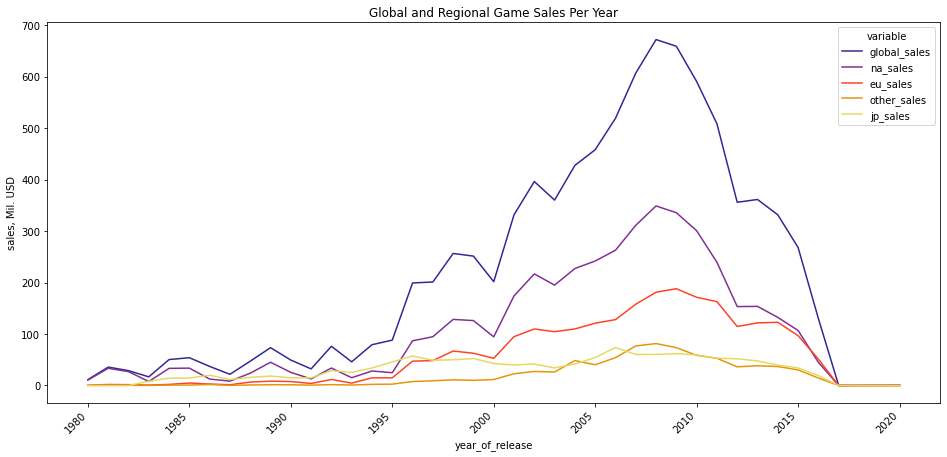

In [46]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
sns.lineplot(x=plf_sales_region['year_of_release'],
             y=plf_sales_region['value'],
             hue=plf_sales_region['variable'],
             palette='CMRmap');

# set axis labels and title
plt.ylabel('sales, Mil. USD')
plt.xticks(rotation=45, ha='right')
plt.title('Global and Regional Game Sales Per Year');

Naturally, a good portion of regional sales follow the trend of global sales. We can see that NA sales, EU sales and sales from other regions have a profile similar to that of the global sales, with explosive growth in the years up to 2009 and declining after. On the other hand, the trend of sales in the JP market seem to remain largely the same starting as early as 1995 and continuing throughout the 21st century.

Let's also look at the breakdown of overall sales by region.

In [47]:
# regional sales
plf_sales_pie = pd.DataFrame({'region':['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                              'total_sales':[sum(games_df['na_sales']), 
                                             sum(games_df['eu_sales']), 
                                             sum(games_df['jp_sales']), 
                                             sum(games_df['other_sales'])]})
plf_sales_pie['percentage'] = plf_sales_pie['total_sales']/sum(plf_sales_pie['total_sales'])*100
plf_sales_pie.sort_values(by='percentage',ascending=False,inplace=True)

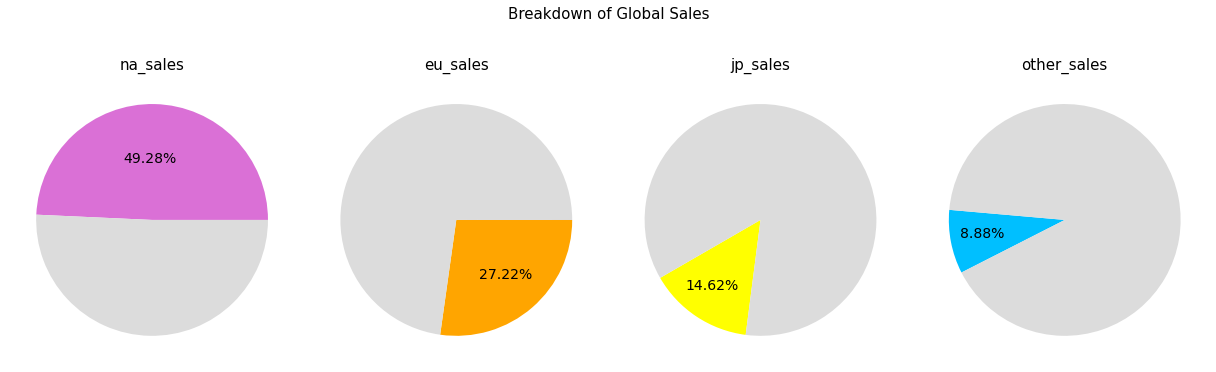

In [48]:
fig = plt.figure(figsize=(17, 8))

# subplots
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

# plot 1
ax1.pie([plf_sales_pie['percentage'][0],100-plf_sales_pie['percentage'][0]],startangle=0,
        colors=['orchid','gainsboro'])
ax1.text(-0.25,0.5,f"{round(plf_sales_pie['percentage'][0],2)}%",fontsize=14)

# plot 2
ax2.pie([plf_sales_pie['percentage'][1],100-plf_sales_pie['percentage'][1]],startangle=262,
        colors=['orange','gainsboro'])
ax2.text(0.2,-0.5, f"{round(plf_sales_pie['percentage'][1],2)}%",fontsize=14)

# plot 3
ax3.pie([plf_sales_pie['percentage'][2],100-plf_sales_pie['percentage'][2]], startangle=210,
        colors=['yellow','gainsboro'])
ax3.text(-0.65,-0.6,f"{round(plf_sales_pie['percentage'][2],2)}%",fontsize=14)

# plot 4
ax4.pie([plf_sales_pie['percentage'][3],100-plf_sales_pie['percentage'][3]],startangle=175,
        colors=['deepskyblue','gainsboro'])
ax4.text(-0.9,-0.15,f"{round(plf_sales_pie['percentage'][3],2)}%",fontsize=14)

# set titles
ax1.set_title('na_sales',fontsize=15)
ax2.set_title('eu_sales',fontsize=15)
ax3.set_title('jp_sales',fontsize=15)
ax4.set_title('other_sales',fontsize=15)
fig.suptitle('Breakdown of Global Sales', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=1.2, wspace=0.05)

# show plot
fig.show()

At 49.18%, the NA market is by far the most profitable region for video game sales, followed by EU at 27.32%, then JP and other regions.

Next, consider the distribution of sales by platform. Let's define platforms that were popular then and now and evaluate the life cycle of platforms.

### 3.4 Distribution of Game Sales by Platform

Let's take a look at global game sales by platform.

In [49]:
# number of sales grouped by platform
plf_sales = games_df.groupby('platform', as_index=False) \
                    .agg({'global_sales': 'sum'}) \
                    .sort_values('global_sales', ascending=False)

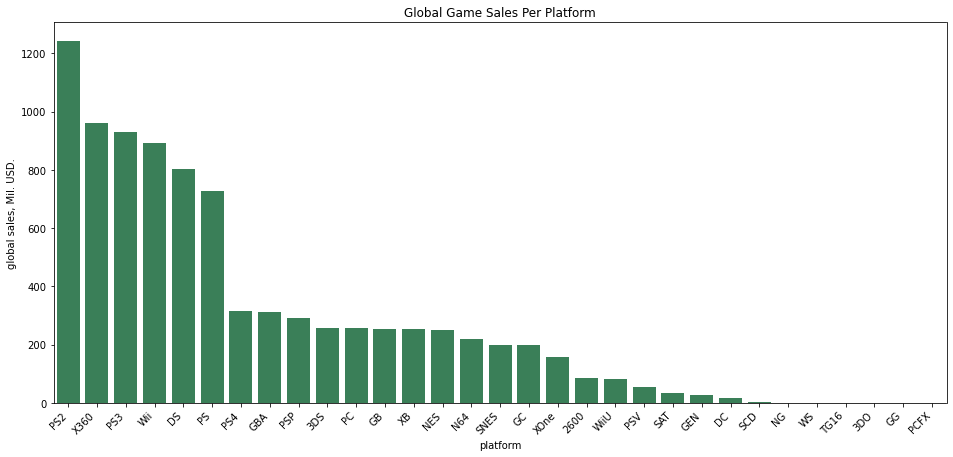

In [50]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=plf_sales['platform'],
                 y=plf_sales['global_sales'],
                 orient='v',
                 color='seagreen');

# set axis labels and title
plt.ylabel('global sales, Mil. USD.')
plt.xticks(rotation=45, ha='right')
plt.title('Global Game Sales Per Platform');

The graph shows the leaders in total global sales: PS2, X360, PS3, Wii, DS, PS. These platforms lead by two to four times as much compared to the next highest-earning platforms. The data of the top 6 platforms is the main contender for detailed further analysis.

To assess the trend of platform popularity over the years, we will select platforms whose total sales exceed the median value, i.e. Let's take the first half of the list ranked by world sales.

In [51]:
# create a list of platform names with total global sales greater than the median
platforms_above_median = []

for row in plf_sales.itertuples(): # iterate over the dataframe
     if row.global_sales > plf_sales.global_sales.median(): # compare sales values with median
         platforms_above_median.append(row.platform) # add the platform name to the list

# check result (list of platform names)
print(platforms_above_median)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC', 'GB', 'XB', 'NES', 'N64']


Then, plot the distribution of game sales per platform per year.

In [53]:
# grouping data by years and platforms and calculating total global sales
plf_sales_year = games_df.query('platform in @platforms_above_median') \
                         .groupby(['year_of_release', 'platform'], as_index=False) \
                         .agg({'global_sales': 'sum'}) \
                         .sort_values('year_of_release', ascending=True)

plf_sales_year = pd.pivot_table(plf_sales_year, values='global_sales', index=['year_of_release'], columns=['platform'])

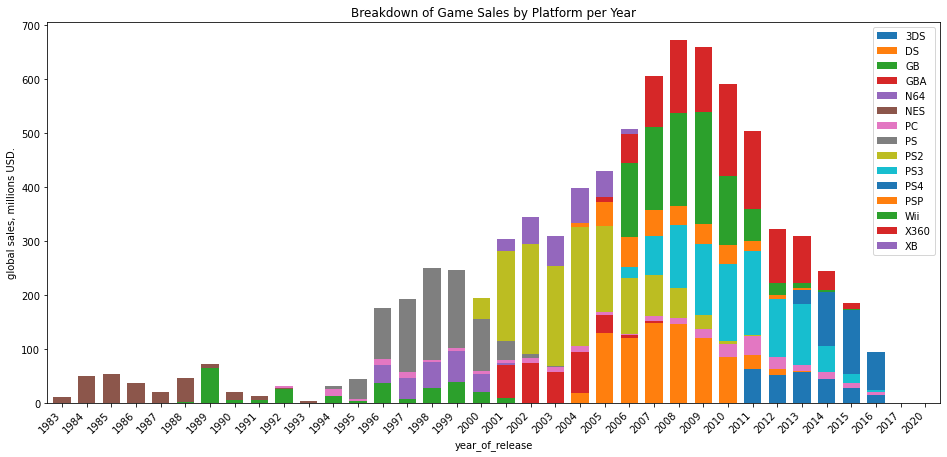

In [54]:
# figure size
fig, ax = plt.subplots(figsize = (16, 7))

# plot
plf_sales_year.plot.bar(stacked = True, 
                        ax = ax,
                        width = 0.7)

# set y-axis label
plt.ylabel('global sales, millions USD.')
plt.title('Breakdown of Game Sales by Platform per Year')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Let's also visualise the distribution of the life cycle of video game platforms. We will consider the main statistics of the resulting indicator.

In [60]:
# calculate platform lifetime
life_span = games_df.groupby('platform')['year_of_release'].max() - games_df.groupby('platform')['year_of_release'].min()

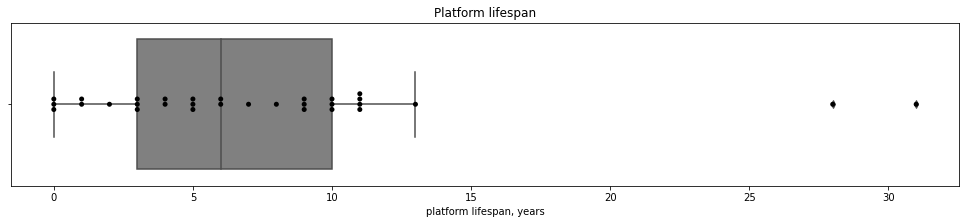

In [68]:
# check outliers in `tenure`
plt.figure(figsize=(17,3))

sns.boxplot(x=life_span, color='grey')
sns.swarmplot(x=life_span, color='black')

# axis labels and chart name
plt.title('Platform lifespan')
plt.xlabel('platform lifespan, years');

In [69]:
# basic platform life cycle statistics
life_span.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

From the bar graph, we can see clearly that some platforms increase and decrease in popularity over time. For example, the PS3 gained a large amount of popularity from 2006-2011 before falling off in 2015. Other platforms retain a low level of popularity but for a long period of time, such as PC games, which make up a small portion of sales from 1994 and continues throughout the 21st century. We also see that the popularity of overall bestseller PS2 has in fact died off and its last sales were in 2011.

The box plot shows that there are two outliers, PC and DS, but otherwise, most of the data is situated within the interquartile range. Due to the presence of outliers, we will use the median value (6 years) instead of the mean to talk about the average value of the platform life cycle.

These visualisations show that it will be incorrect for our tasks to select data across the entire range of history as this will greatly distort the results of our research. Therefore, we will take another criterion for our sample: we will take only data within the last 6 years. Thus, our sample will include both platforms at the peak of popularity, as well as new emerging platforms that will be popular in the future.

Let's take the most relevant data, making a sample for the last 6 years (starting from 2010), and look at the breakdown of sales by platform per region.

In [70]:
# get sales from 2006 onwards
sample_df = games_df[games_df['year_of_release']>=2010]

In [71]:
plf_sales_region = sample_df[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
                       .groupby('platform', as_index=False) \
                       .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
                       .set_index('platform')

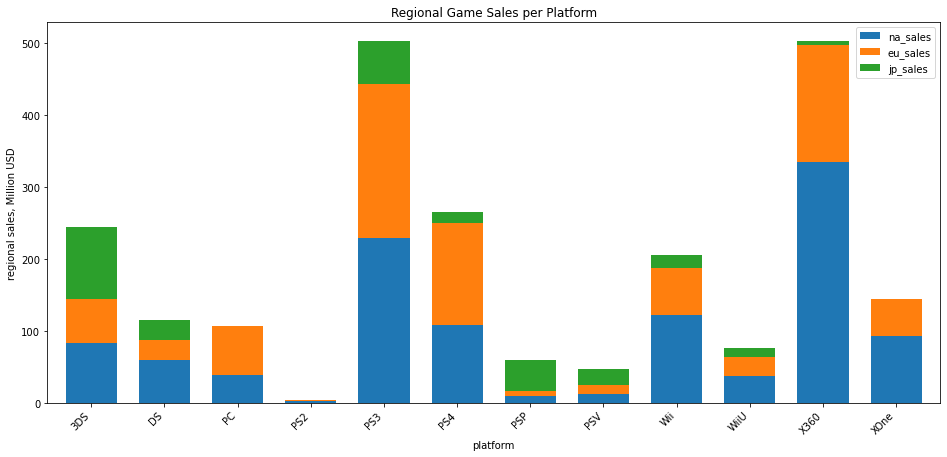

In [72]:
# plot size
fig, ax = plt.subplots(figsize = (16, 7))

# set x and y variables
plf_sales_region.plot.bar(stacked = True, 
                          ax = ax,
                          width = 0.7)

# set axis labels and title
plt.ylabel('regional sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title('Regional Game Sales per Platform');

The list of top 5 platforms is as follows:
1. PS3
2. X360
3. PS4
4. 3DS
5. Wii

Further, we note that from 2010 onwards, the most popular platforms in the EU market are from the manufacturer Sony (PS3, PS4), in NA, the X360 by Microsoft, and in Japan, the 3DS by Nintendo.

### 3.5 Game sales by genre

Next, let's look at the general distribution of games by genre.

In [ ]:
# global sales grouped by genre
genre_sales = sample_df.groupby(['genre'], as_index=False) \
                      .agg({'global_sales': 'sum'}) \
                      .sort_values('global_sales', ascending= False)

In [ ]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=genre_sales['genre'],
                 y=genre_sales['global_sales'],
                 orient='v',
                 color='rebeccapurple');

# set axis labels and title
plt.ylabel('global sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title('Global Game Sales per Genre');

The most popular genres are Action, Shooter and Sports. The fourth place is occupied by the Role-Playing genre. Sales for other games differ significantly. Sales of games in the most unpopular genres (Puzzle and Strategy) differ by almost ten times compared to other genres.

In [ ]:
# regional sales grouped by genre
genre_sales_region = sample_df[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
                         .groupby('genre', as_index=False) \
                         .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
                         .melt(id_vars=['genre']) \
                         .sort_values('value', ascending=False)

In [ ]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=genre_sales_region['genre'],
                 y=genre_sales_region['value'],
                 orient='v',
                 palette='plasma',
                 hue=genre_sales_region['variable']);

# set axis labels and title
plt.ylabel('regional sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title('Regional Game Sales per Genre');

List of Top 5 most popular genres:
1. Action
2. Shooter
3. Sports
4. Role Playing
5. Misc

Note that in Japan market, shooters are much less popular in comparison with Europe and North America. In Japan, the most popular genres are Role-Playing and Action. It is also worth noting that the total sales of games of all genres in North America and Europe are approximately comparable, while JP sales account for less than half of all sales.

### 3.6 Game sales by publisher

In [ ]:
# global sales grouped by publisher (top 15)
publish_sales = sample_df.groupby(['publisher'], as_index=False) \
                        .agg({'global_sales': 'sum'}) \
                        .sort_values('global_sales', ascending= False) \
                        .head(15)

In [ ]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=publish_sales['publisher'],
                 y=publish_sales['global_sales'],
                 orient='v',
                 color='lightsteelblue');

# set axis labels and title
plt.ylabel('global sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title('Global Game Sales per Publisher (Top 15)');

In [ ]:
# regional sales grouped by publisher
publish_sales_na = sample_df[['publisher', 'na_sales']] \
                         .groupby('publisher', as_index=False) \
                         .agg({'na_sales': 'sum'}) \
                         .sort_values(by='na_sales', ascending=False).head(10)

publish_sales_eu = sample_df[['publisher','eu_sales']] \
                         .groupby('publisher', as_index=False) \
                         .agg({'eu_sales': 'sum'}) \
                         .sort_values(by='eu_sales', ascending=False).head(10)

publish_sales_jp = sample_df[['publisher','jp_sales']] \
                         .groupby('publisher', as_index=False) \
                         .agg({'jp_sales': 'sum'}) \
                         .sort_values(by='jp_sales', ascending=False).head(10)

In [ ]:
# plot size
plt.figure(figsize=(17, 6))

#plot 1: na
x = publish_sales_na['publisher']
y = publish_sales_na['na_sales']

plt.subplot(1, 3, 1)
plt.bar(x,y, color='lightseagreen')
plt.ylabel('global sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title("na_sales")
plt.ylim(0, 175)

#plot 2: eu
x = publish_sales_eu['publisher']
y = publish_sales_eu['eu_sales']

plt.subplot(1, 3, 2)
plt.bar(x,y, color='orange')
plt.xlabel('publisher')
plt.xticks(rotation=45, ha='right')
plt.title("eu_sales")
plt.ylim(0, 175)

#plot 3: jp
x = publish_sales_jp['publisher']
y = publish_sales_jp['jp_sales']

plt.subplot(1, 3, 3)
plt.bar(x,y, color='yellow')
plt.xticks(rotation=45, ha='right')
plt.title("jp_sales")
plt.ylim(0, 175)

plt.show()

The top 5 publishers in NA and EU are extremely similar, albeit in slight differently order. On the other hand, Nintendo makes up the top sales in Japan by a large margin and other popular western publishers are not present at all.

We have already established that the JP playerbase differs from the western playerbase in terms of preference of video game genres. As video game publishers often produce games from similar genres, it is to be expected that there would be a difference in preference for publishers amoung regions as well.

At this stage, an exploratory analysis and visualisations of the data were carried out. The number of games released in different periods is certain (half of the games presented were released from 2007 to 2016).

The average life cycle of the popularity of gaming platforms (about 6 years) is noted.

The three most relevant platforms at the moment and in terms of perspectives for the next few years (PS3, X360, 3DS) have been identified. 

The most popular game genres over the past 6 years (Action, Shooter and Sports) have been found. 

It was also noted that a small number of hit games generates most of the total revenue. Sales of which are dozens of times higher than the sales of the average by the standards of the total world sales of games.

For regional differences, sales in NA make up almost half the profits of the video game market.

Each region has their own distinct preferences for platform, genres and publishers, though the preferences for genre and publisher in EU and NA do not differ by much. Nintendo is the most popular in both platform manufacturer and publisher for the Japanese playerbase by a significant margin.

### `critic_score` against `user_score`

In this step, we will study `user_score` and `critic_score` in more detail. Let's take the data slice used in the previous step (data for the last 6 years (starting from 2010).

In [75]:
# get the necessary slice of data, bringing the critic_score to the dimension of user_score by dividing by 10
scores_df = sample_df.assign(critic_score= lambda x: x.critic_score / 10) \
                      .groupby('genre', as_index=False)\
                      .agg({'critic_score': 'mean', 'user_score': 'mean'}) \
                      .melt(id_vars=['genre']) \
                      .sort_values('value', ascending=False)

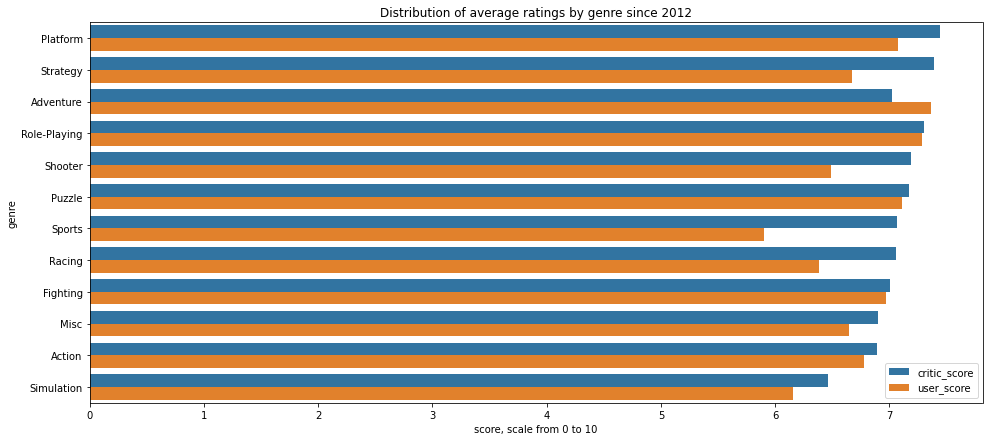

In [78]:
# figure size
plt.figure(figsize=(16, 7))

# setting parameters for plotting a graph
ax = sns.barplot(y=scores_df['genre'],
                  x=scores_df['value'],
                  orient='h',
                  hue=scores_df['variable']);

# axis labels and titles
ax.legend(loc = 'best')
plt.xlabel('score, from 0 to 10')
plt.title('Distribution of average ratings by genre since 2010');

In most cases, critics' and users' ratings match up, especially for the Role-Playing, Puzzle and Fighting genres. The greatest discrepancies in ratings between critics and users are observed for the Sports and Racing genres (in both cases, critics are more favorable to the games compared to users). The genres Strategy, Platform and Role-Playing have the highest average ratings from critics.
It is interesting to note that for all genres, the average critic rating is almost always higher than the average user rating with exceptions for Adventure.

Let's look at the distribution of ratings from critics and users.

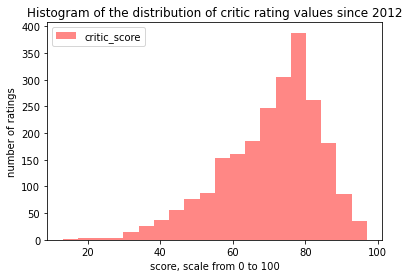

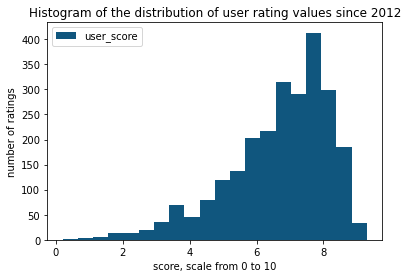

In [80]:
# building a histogram for critics' ratings
sample_df.plot(y='critic_score',
                kind='hist',
                bins=20,
                color='#FF8785')

# axis labels and titles
plt.legend(loc = 'upper left')
plt.xlabel('score, scale from 0 to 100')
plt.ylabel('number of ratings')
plt.title('Histogram of the distribution of critic rating values since 2012');


# building a histogram for user ratings
sample_df.plot(y='user_score',
                kind='hist',
                bins=20,
                color='#10567E')

# axis labels and titles
plt.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.ylabel('number of ratings')
plt.title('Histogram of the distribution of user rating values since 2012');

Both distributions are close to normal. Unimodal and symmetrical in shape. This means that there are no serious errors in the data and you can treat them as really independent and random relative to each other. Therefore, in the future we can use the basic statistical math. apparatus for testing various hypotheses.

Let's look at the distributions of the main statistics of critics' and users' ratings (mean, variance, standard deviation).

In [81]:
# statistics
# maximum values for each column are highlighted in green
# minimum values for each column are highlighted in red
stats_df = sample_df.assign(critic_score= lambda x: x.critic_score / 10) \
                    .groupby('genre', as_index=False)\
                    .agg({'critic_score': ['mean', 'var', 'std'],
                          'user_score': ['mean', 'var', 'std']}) \
                    .style.highlight_min(axis=0, color='#FFC3C2') \
                    .highlight_max(axis=0, color='#D8ECC1')
stats_df

The maximum average rating from critics was received by games of the Strategy genre, the minimum games of the Simulation genre. The greatest spread of ratings among critics is observed for games of the Sports genre, the smallest for Puzzle games.

The maximum average rating of users was received by games of the Puzzle genre, the minimum games of the Sports genre. The greatest spread of ratings among users is observed for games of the Strategy genre, the smallest for Puzzle games.

Perhaps in the ranks of ordinary users there is a group of game lovers who have a pronounced negative attitude towards games of the Sport genre and rate these games as low as possible. Critics are more based not on personal preferences of genres, but on the quality of games in general. This may explain the highest delta of ratings for Sports games by critics and users, as well as the largest spread of ratings (variance and standard deviation) for Sports games among users, after the Strategy genre.

***

## 4. Hypothesis testing
*Hypothesis Test #1* \
**Null hypothesis:** The average user ratings for the Xbox One and PC platforms are the same. \
**Alternative Hypothesis:** Average user ratings for the Xbox One and PC platforms are different.

In [82]:
# make a sample of the data required to test the hypothesis
sample_1 = np.asarray(sample_df.query('platform == "XOne"').user_score.to_list())
sample_2 = np.asarray(sample_df.query('platform == "PC"').user_score.to_list())

# remove NaN values from our selections
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05 # critical level of statistical significance
# if p-value is less than it - reject the hypothesis

# test for equality of variances
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
     param=True
     print('Both samples have similar variances')
else:
     print('The sample variances are different. We will use equal_var = False')
     param = False

    
# conducting t-test
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-value:', results.pvalue)

if results.pvalue < alpha:
     print("Reject the null hypothesis")
else:
     print("Failed to reject null hypothesis")

The sample variances are different. We will use equal_var = False
p-value: 0.9699535341568966
Failed to reject null hypothesis


The null hypothesis could not be rejected. Therefore, we have strong reasons to believe that the average ratings for the Xbox One and PC platforms are the same.

*Hypothesis test #2.*

**Null hypothesis:** The average user ratings for the Action and Sports genres are the same.
**Alternative Hypothesis:** Average user ratings for the Action and Sports genres are different.

In [83]:
# make a sample of the data required to test the hypothesis
sample_1 = np.asarray(sample_df.query('genre == "Action"').user_score.to_list())
sample_2 = np.asarray(sample_df.query('genre == "Sports"').user_score.to_list())

# remove NaN values from our selections
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05 # critical level of statistical significance
# if p-value is less than it - reject the hypothesis


# test for equality of variances
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
     param=True
     print('Both samples have similar variances')
else:
     print('The sample variances are different. We will use equal_var = False')
     param = False

    
# conducting t-test
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-value:', results.pvalue)

if results.pvalue < alpha:
     print("Reject the null hypothesis")
else:
     print("Failed to reject null hypothesis")

The sample variances are different. We will use equal_var = False
p-value: 1.111916534916957e-15
Reject the null hypothesis


We were able to reject the null hypothesis. Thus, we have strong reason to believe that the average user ratings for the Action and Sports genres are different.

### Summary

At this stage, we were able to test two hypotheses about average user ratings. As a result of testing the hypotheses, we can now believe with a high degree of confidence that:

- he average user ratings for the Xbox One and PC platforms are the same;
- the average user ratings for the Action and Sports genres are different.

***

## 5. Conclusions

In this project, we explored 16719 records of historical video game sales data from 1980 to 2016.

Of the 16719 rows, we filled 42 with release year and publisher data obtained from related data sources, and removed 261 rows of missing data. Of the 17 columns, we discovered that one was a dummy columns. After correcting and transforming the data, we removed the dummy column.

Through exploratory analysis and visualization of the trends present in our data, we were able to determine the following:
- Half of all the recorded video games were released between 2007 and 2016.
- The peak of global sales and number of games released was 2008 to 2009. Since then, the video game industry appears to be in decline. 
- The life cycle of a video game platform has a median of about 6 years, though outliers such as PC gaming have lasted for almost 30 years. From the trends in the data, there may be a rise of the PS4, X360, DS3 platforms in the near future.
- The most popular genres over the past 5 years are: Action, Shooter, Sports, Role-Playing, Misc
- Most of the revenue from video game sales is generated by a small number of hit games, which sell for more than 10x other games
- The playerbase of NA and EU consumers are similar in preferences while JP consumers stand out in terms of platform choice and preferred genre. Thus when conducting business with each region, it may be beneficial to consider the historical and cultural differences as they are reflected in the players' preferences.
- critics' and users' ratings have an average correlation and generally agree well with each other. At the same time, it was found that the ratings of critics and ratings of users do not greatly affect the dynamics of sales (in both cases, there is a weak correlation)
- Through hypothesis testing, we found that the average user ratings of the Xbox One and PC platforms are the same, while the average user ratings for Action and Sports genres are different.

Some aspects of video game sales that may be confounders:
- The data only accounts for physical video game sales. This data does not consider the revenue generated by digital video game sales, subscription-based sales and free-to-play games with microtransactions. Therefore this data should not be used as a reflection of the state of the current video game market but merely for physical sales. 
- Wii Sports, the best-selling game in this dataset, [was bundled with every Wii console sold](https://www.denofgeek.com/games/wii-sports-best-selling-nintendo-game-ever-explained-retrospective/). Every Wii console sold essentially counted as a sale of Wii Sports as well. Undoubtedly, this has inflated the sales numbers of Wii Sports by a fair amount. However, it is difficult to tell by how much.

Ultimately, these are the recommendations made based on the analysed data:
- Bet on the sale of games for the PS4, XOne and DS3 platforms
- Give preference to games of the Action, Shooter and Role-Playing genres
- Take into account the specifics of the Asian market when launching advertising campaigns 
- In the long term, consider about business diversification and / or other sources of revenue.

### Further Research
These are avenues of research that may be of further interest:
- Comparisons of similarity between NA and EU markets. It may be worth attempting to determine the correlation between NA sales and EU sales given the similarities of each region's preferences.
- Build a classification model to predict which games will be popular based on genre, platform, developer, critic score and user score